In [83]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [84]:
labels1 = pd.read_csv("statues_labels.csv")
labels2 = pd.read_csv("statues_labels2.csv", names=["filename", "xmin", "ymin", "xmax", "ymax", "class"], sep=",")

In [85]:
lenin_df    = labels1.loc[labels1["class"] == "lenin"]
other_df    = labels1.loc[labels1["class"] == "other"]
ataturk_df  = labels2.loc[labels2["class"] == "ataturk"]

In [86]:
def get_stat1(df):
    x1 = df["xmin"].values
    y1 = df["ymin"].values
    x2 = df["xmax"].values
    y2 = df["ymax"].values
    img_w = df["width"].values
    img_h = df["height"].values
    w = (x2 - x1)/img_w
    h = (y2 - y1)/img_h
    
    return w, h, img_w, img_h

def get_stat2(df):    
    img_paths = df.loc[:, "filename"].values
    img_w = []
    img_h = []
    for img_path in img_paths:
        img_path = "statues-ataturk/" + img_path
        img = Image.open(img_path)
        img_w.append(img.width)
        img_h.append(img.height)
    
    img_w = np.array(img_w, dtype=np.float32)
    img_h = np.array(img_h, dtype=np.float32)

    x1 = df["xmin"].values
    y1 = df["ymin"].values
    x2 = df["xmax"].values
    y2 = df["ymax"].values

    w = (x2 - x1)/img_w
    h = (y2 - y1)/img_h

    return w, h, img_w, img_h

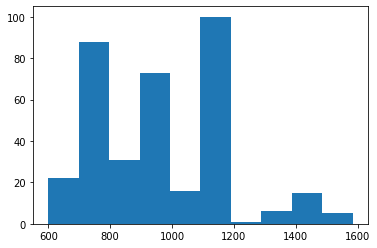

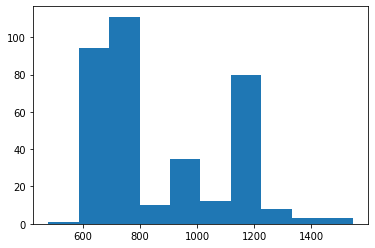

0.06823419370082516 0.08780949616086696


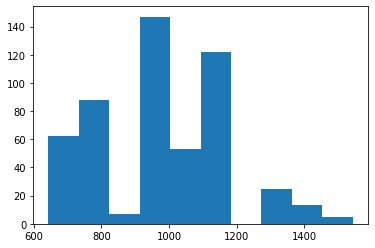

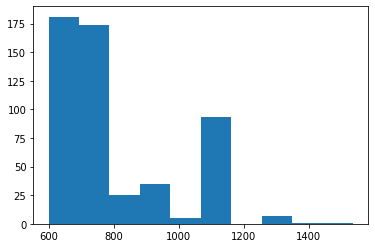

0.05477209297749091 0.07788397795941314


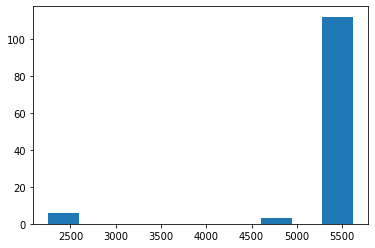

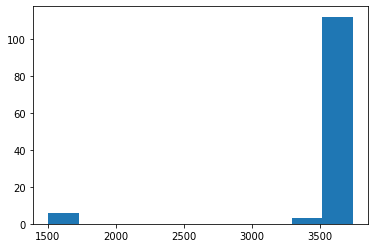

0.03693655567279926 0.06347270149759698


In [87]:
w, h, img_w, img_h = get_stat1(lenin_df)
w_mean = w.mean()
h_mean = h.mean()
plt.hist(img_w)
plt.show()
plt.hist(img_h)
plt.show()
print(w_mean, h_mean)

w, h, img_w, img_h = get_stat1(other_df)
w_mean = w.mean()
h_mean = h.mean()
plt.hist(img_w)
plt.show()
plt.hist(img_h)
plt.show()
print(w_mean, h_mean)

w, h, img_w, img_h = get_stat2(ataturk_df)
w_mean = w.mean()
h_mean = h.mean()
plt.hist(img_w)
plt.show()
plt.hist(img_h)
plt.show()
print(w_mean, h_mean)